In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
train = np.loadtxt('click.csv', delimiter = ',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [28]:
theta0 = np.random.rand()
theta1 = np.random.rand()

In [29]:
def f(x): 
    return theta0 + theta1 * x

In [30]:
def E(x, y):
    return 0.5 * np.sum((y-f(x)) **2)

In [31]:
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x-mu)/sigma
train_z = standardize(train_x)

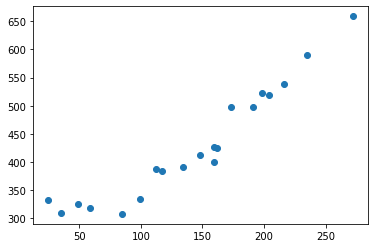

In [32]:
plt.plot(train_x, train_y, 'o')

In [33]:
ETA = 1e-3
diff = 1
count = 0
error = E(train_z, train_y)

In [34]:
while diff > 1e-2:
    tmp0 = theta0 - ETA * np.sum((f(train_z)- train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z)- train_y) * train_z)
    theta0 = tmp0                
    theta1 = tmp1
    current_error= E(train_z, train_y)
    diff = error - current_error
    error = current_error
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 ={:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 8.816, theta1 = 1.874, 差分 =76310.5011
2回目: theta0 = 17.223, theta1 = 3.706, 差分 =73288.6053
3回目: theta0 = 25.461, theta1 = 5.501, 差分 =70386.3765
4回目: theta0 = 33.535, theta1 = 7.261, 差分 =67599.0760
5回目: theta0 = 41.447, theta1 = 8.985, 差分 =64922.1526
6回目: theta0 = 49.201, theta1 = 10.675, 差分 =62351.2353
7回目: theta0 = 56.800, theta1 = 12.331, 差分 =59882.1264
8回目: theta0 = 64.247, theta1 = 13.954, 差分 =57510.7942
9回目: theta0 = 71.545, theta1 = 15.545, 差分 =55233.3667
10回目: theta0 = 78.697, theta1 = 17.103, 差分 =53046.1254
11回目: theta0 = 85.706, theta1 = 18.631, 差分 =50945.4989
12回目: theta0 = 92.575, theta1 = 20.128, 差分 =48928.0571
13回目: theta0 = 99.307, theta1 = 21.595, 差分 =46990.5060
14回目: theta0 = 105.904, theta1 = 23.032, 差分 =45129.6820
15回目: theta0 = 112.369, theta1 = 24.441, 差分 =43342.5466
16回目: theta0 = 118.704, theta1 = 25.822, 差分 =41626.1818
17回目: theta0 = 124.913, theta1 = 27.175, 差分 =39977.7850
18回目: theta0 = 130.998, theta1 = 28.501, 差分 =38394.6647
19回目: theta0 = 136.9

In [35]:
x =np.linspace(-3, 3, 500)
# なんでこの範囲内でプロットするべきであることがわかるの？

In [36]:
f(standardize(100))

370.9672717009747

In [37]:
theta = np.random.rand(3)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x **2]).T
# この最後につくTってなに？

In [38]:
X = to_matrix(train_z)

In [39]:
def f(x):
    return np.dot(x, theta)

In [40]:
diff = 1
error = E(X, train_y)
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X)-train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

In [41]:
def MSE(x, y):
    return (1/x.shape[0]) * np.sum(y-f(x) ** 2)
theta = np.random.rand(3)
errors = []
diff = 1
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot((f(X)-train_y), X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    

In [42]:
x = np.arange(len(errors))

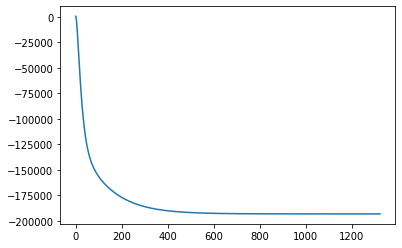

In [43]:
plt.plot(x, errors)

In [51]:
theta = np.random.rand(3)
errors = []
diff = 1
errors.append(MSE(X, train_y))
while diff > 1e-2:
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x)-y) * x
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]